In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv('/Users/anishdulla/Desktop/DataScience/Datasets/advertising_and_sales_clean.csv')

In [3]:
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


### Simple Linear Regression

In [4]:
# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

In [5]:
# Check the shape of the features and targets
print(X)
print(y)
print(X.shape, y.shape)

[[ 6566.23]
 [ 9237.76]
 [15886.45]
 ...
 [19800.07]
 [17534.64]
 [15966.69]]
[ 54732.76  46677.9  150177.83 ... 163631.46 253610.41 148202.41]
(4546, 1) (4546,)


In [6]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [7]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

LinearRegression()

In [8]:
# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


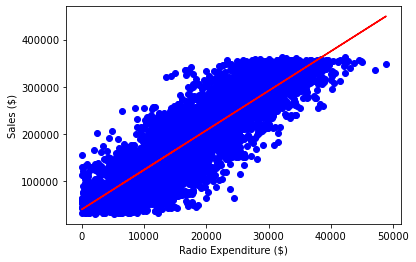

In [9]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

### Multiple Linear Regression

In [12]:
from sklearn.model_selection import train_test_split

In [22]:
# Create X and y arrays
X = sales_df.drop(["influencer", "sales"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


### Regression Performance

In [26]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001


### Cross Validation for R-Squared

In [27]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [29]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


### Regularized Regression

#### Ridge Regression

In [31]:
#Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
    
  
  # Create a Ridge regression model
    ridge = Ridge(alpha=alpha)
  
  # Fit the data
    ridge.fit(X_train, y_train)
  
  # Obtain R-squared
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.999015210475987, 0.9990152104764387, 0.9990152104809561]


#### Lasso Regression

[ 3.56256962 -0.00397035  0.00496385]


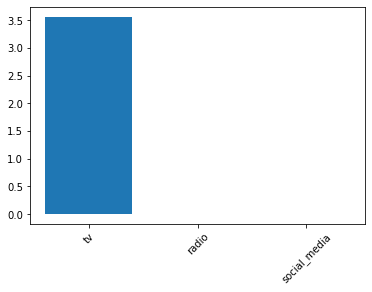

In [33]:
# Import Lasso
from sklearn.linear_model import Lasso

sales_columns = sales_df.drop(["influencer", "sales"], axis=1).columns

# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()